<center><div style="background-image: url('Images/S__8929299.jpg'); background-size: cover; background-position: center; background-repeat: no-repeat; width: 500px; height: 500px; display: flex; justify-content: center; align-items: center;">
  <h3 style="color: black; text-align: center; font-style: italic;">
    ฝุ่น PM 2.5 ได้กลับมากลายเป็นปัญหาสำคัญที่ทุกคนพูดถึงในช่วงที่ผ่านมา หลายคนได้รับผลกระทบตัวอย่างเช่น อาทิตย์ที่แล้วทุกคนต้องกลับไปเรียนออนไลน์กัน กลุ่ม BBB จึงเกิดข้อสงสัยว่า อากาศที่แย่ลงจะทำให้การท่องเที่ยวลดลงด้วย</br> แต่...จะเป็นแบบนั้นจริงหรือไม่?
  </h3>
</div>
</center>

In [25]:
# library ที่ใช้   
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import requests 
from matplotlib import rc #ทำฟ้อนภาษาไทย

import matplotlib.pyplot as plt

from collections import Counter
import datetime

import io
import PIL
import os

#pip install geopandas


In [26]:
# อ่านไฟล์ค่าฝุ่น PM 2.5 และวันที่
data_folder = "data"

# List to store individual DataFrames
dfs = []

# Loop through each file in the folder
for file_name in os.listdir(data_folder):
    # Check if the file is a CSV
    if file_name.endswith('.csv'):
        file_path = os.path.join(data_folder, file_name)
        # Read the CSV file and append it to the list
        dfs.append(pd.read_csv(file_path))

# Concatenate all DataFrames
df = pd.concat(dfs, ignore_index=True)
df.columns = ['Province', 'PM2.5', 'Date']  
df["Date"] = pd.to_datetime(df["Date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30030 entries, 0 to 30029
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Province  30030 non-null  object        
 1   PM2.5     30030 non-null  float64       
 2   Date      30030 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 704.0+ KB


In [27]:
#เช็คว่ามีครบ 77 จังหวัด
province_counts =  df.groupby("Province").size()
province_counts

Province
กระบี่           390
กรุงเทพมหานคร    390
กาญจนบุรี        390
กาฬสินธุ์        390
กำแพงเพชร        390
                ... 
เพชรบุรี         390
เพชรบูรณ์        390
เลย              390
แพร่             390
แม่ฮ่องสอน       390
Length: 77, dtype: int64

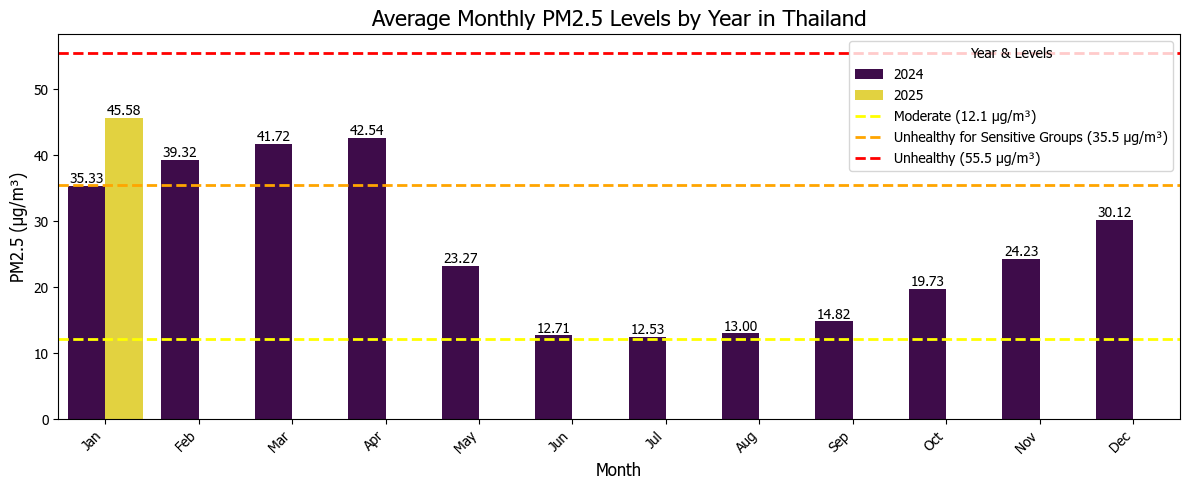

In [28]:
# ค่า่เฉลี่ยฝุ่นของประเทศไทยตั้งแต่ 1 มกราคม 2024 - 26 มกราคม 2025
df["Year"] = df["Date"].dt.year  # ดึงปีจากคอลัมน์ "Date"
df["Month"] = df["Date"].dt.month  # ดึงเดือนจากคอลัมน์ "Date"

# คำนวณค่าเฉลี่ย PM2.5 ตามปีและเดือน
monthly_avg_pm = df.groupby(["Year", "Month"])["PM2.5"].mean()

# รีเซ็ต index เพื่อให้ข้อมูลกลับมาเป็น DataFrame
monthly_avg_pm_df = monthly_avg_pm.reset_index()

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_avg_pm_df["Month"] = monthly_avg_pm_df["Month"].apply(lambda x: month_names[x - 1])

plt.figure(figsize=(12, 5))
ax = sns.barplot(data=monthly_avg_pm_df, x="Month", y="PM2.5", hue="Year", palette="viridis")

for p in ax.patches:
    height = p.get_height()
    #print(f'Bar height: {p.get_height():.2f}')  
    
    if height > 0:  # ตรวจสอบว่า height > 0 ก่อนที่จะพล็อต มี bar เพิ่มมาจากกำหนด hue
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
        
# Add threshold lines for PM2.5 levels
ax.axhline(12.1, color='yellow', linewidth=2, linestyle='--', label="Moderate (12.1 µg/m³)")
ax.axhline(35.5, color='orange', linewidth=2, linestyle='--', label="Unhealthy for Sensitive Groups (35.5 µg/m³)")
ax.axhline(55.5, color='red', linewidth=2, linestyle='--', label="Unhealthy (55.5 µg/m³)")


# Customize the plot
plt.title("Average Monthly PM2.5 Levels by Year in Thailand", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("PM2.5 (µg/m³)", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Show the legend and plot
plt.legend(title="Year & Levels", fontsize=10)
plt.tight_layout()
plt.show()



<p>จะเห็นได้ว่าเดือนมกราคมปี2025 ค่าฝุ่นเฉลี่ยเพิ่มขึ้นมาจากปีก่อน 10 ไมโครกรัม หรือคิดเป็นประมาณ29%</p>
<p>สีเหลืองคือระดับปานกลาง สีส้มอันตรายสำหรับกลุ่มเสี่ยง และสีแดงคืออันตรายสำหรับทุกคน</p>
<p>จากค่าเฉลี่ยนี้ประเทศไทยอาจจะดูปลอดภัย แต่อย่าให้ค่าเฉลี่ยนี้หลอกคุณ เพราะนี้เป็นเพียงค่าเฉลี่ยของประเทศ เพราะเเค่การที่ร่างกายเราได้รับหรือสัมผัสกับฝุ่น PM2.5 ในระดับอันตรายเเค่วันเดียวก็สามารถส่งผลกระทบต่อสุขภาพเราได้เเล้ว</p>


<img src="Images/Health+effects+PM2.jfif" height= "400px" width = "750px">

<h3>พล้อตจำนวนวันที่แต่ละจังหวัดในประเทศไทยต้องเจอกับระดับฝุ่นที่ส่งผลกระทบต่อสุขภาพทุกคน หรือ จำนวนวันที่มีค่าฝุ่น PM 2.5 มากกว่า 55.5 ไมโครกรัมต่อลูกบาศก์เมตร</h3>
<p>ระดับนี้เป็นระดับที่เพิ่มอาการของโรคปอด โรคหัวใจ และเสียชีวิตก่อนวัย ในผู้ป่วยโรคหัวใจและปอด และ ผู้สูงวัย และ ส่งผลกระทบต่อระบบทางเดินหายใจในประชากรทั่วไป</p>

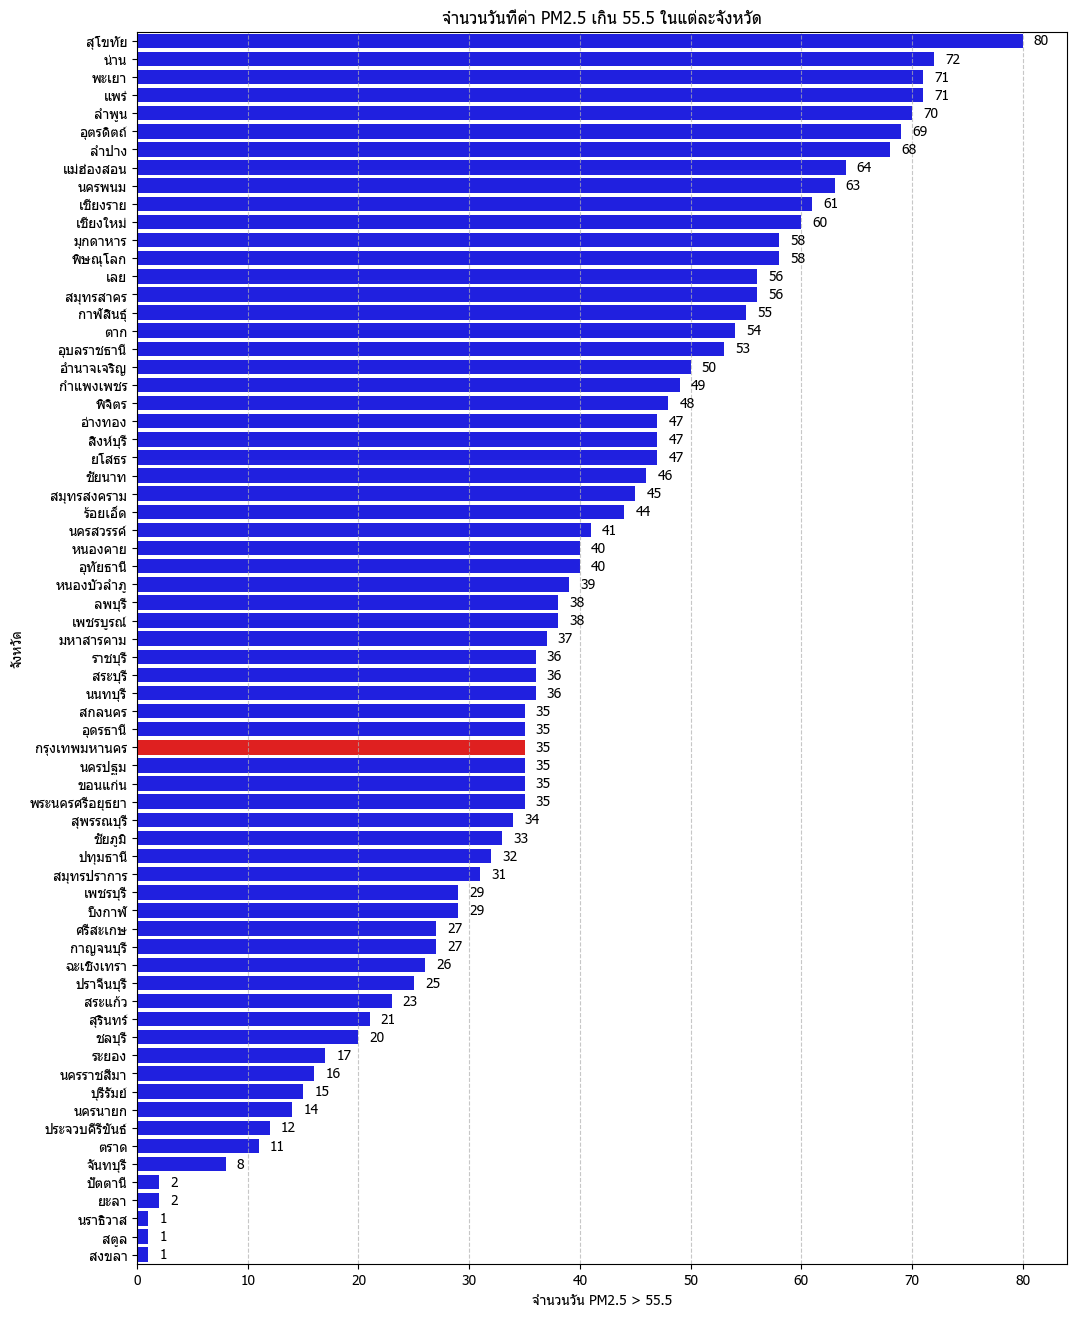

In [29]:
# 📌 กรองข้อมูลเฉพาะวันที่ PM2.5 > 55.5
df_filtered = df[df["PM2.5"] > 55.5]

# 📌 นับจำนวนวันของแต่ละจังหวัดที่ค่าฝุ่นเกิน 55

province_counts = df_filtered.groupby("Province")["Date"].nunique().reset_index()
province_counts = province_counts.sort_values(by="Date", ascending=False)  # เรียงจากมากไปน้อย

# 📌 กำหนดสี: ให้กรุงเทพฯ เป็นสีแดง และจังหวัดอื่นเป็นสีเทา
colors = ["red" if province == "กรุงเทพมหานคร" else "blue" for province in province_counts["Province"]]
plt.rcParams['font.family'] = 'Tahoma'

# 📌 สร้างกราฟแท่งแนวนอน (Bar Chart)
plt.figure(figsize=(12, 16))
ax = sns.barplot(data=province_counts,
                x="Date",
                y="Province",
                palette=colors,
                hue="Province",  
                legend=False)

# 📌 เพิ่ม Data Label ที่ปลายแท่ง
for index, value in enumerate(province_counts["Date"]):
    ax.text(value + 1, index, str(value), color="black", va="center")

# 📌 ปรับแต่ง Label และ Title
plt.xlabel("จำนวนวัน PM2.5 > 55.5")
plt.ylabel("จังหวัด")
plt.title("จำนวนวันที่ค่า PM2.5 เกิน 55.5 ในแต่ละจังหวัด")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# 📌 แสดงผล
plt.show()
plt.show()

<p>เมื่อเราดูจำนวนวันที่ที่แต่ละจังหวัดนั้นมีค่าฝุ่นมากกว่าระดับ55.5 ไมโครกรัมต่อลูกบาศก์เมตร (ซึ่งเป็นระดับที่อันตรายต่อคนทุกกลุ่มและยังทำให้เพิ่มความเสี่ยงที่จะเป็นโรคปอดและโรคหัวใจและเสียชีวิตก่อนวัยอันควร) จะเห็นว่าจังหวัดที่มีวันอันตรายมากที่สุดคือสุโขทัยซึ่งมีมากถึง 80 วัน ส่วนกรุงเทพมีจำนวนวันอันตราย 35วัน</p>
<p>จะเห็นว่ามากกว่าครึ่งของจังหวัดในไทยมีวันอันตรายมากกว่า 30 วัน </p>


<img src="Images/Screenshot (844)_1.png" >
</br>การเปรียบเทียบผลต่อสุขภาพจากฝุ่น pm2.5 การที่ได้รับ pm2.5 ในระดับ 22 ไมโครกรัมจะเปรียบเสมือนการสูบบุหรี่หนึ่งมวน
</br>ข้อมูลโดย รศ.พญ. บุษยามาส ชีวสกุลยง หัวหน้าหน่วยมะเร็งวิยา ภาควิชาอายุรศาสตร์ คณะแพทยศาสตร์ มหาวิทยาลัยเชีบงใหม่

In [30]:
# 10วันที่มีค่า PM 2.5 มากที่สุดในไทย
top_10_pm25 = df.nlargest(10, 'PM2.5')

# Display the result
print(top_10_pm25)

         Province       PM2.5       Date  Year  Month
15925    เชียงราย  166.623436 2024-04-06  2024      4
22211  แม่ฮ่องสอน  165.848471 2024-04-03  2024      4
19897   เชียงใหม่  160.875515 2024-04-06  2024      4
15922    เชียงราย  156.894626 2024-04-03  2024      4
19894   เชียงใหม่  156.500525 2024-04-03  2024      4
15924    เชียงราย  155.303240 2024-04-05  2024      4
15951    เชียงราย  153.978793 2024-05-02  2024      5
22192  แม่ฮ่องสอน  153.641211 2024-03-15  2024      3
15904    เชียงราย  153.433638 2024-03-16  2024      3
19898   เชียงใหม่  153.052824 2024-04-07  2024      4


วันที่มีค่าฝุ่นสูงที่สุดในไทยในปี2024 เป็นของจังหวัดเชียงราย ซึ่งมีค่าฝุ่นสูงมากถึง 166 ไมโครกรัม ต่อ ลูกบาศก์เมตร
ถ้าเทียบการที่ต้องสูดฝุ่นในวันนั้นจะเท่ากับการสูบบุหรี่ 7.6 มวน

<h3>ปริมาณฝุ่นในแผนที่ประเทศไทย</h3>

In [31]:
# อ่านไฟลล์ geopandas merge กับค่าเฉลี่ยฝุ่น 
tha_map = gpd.read_file(r"geopandas\tha_admbnda_adm1_rtsd_20190221.shp")
columns_to_drop = tha_map.columns[5:16]  # Indices 5 to 15 (Python indexing is exclusive at the end)


# Group by province and calculate the mean PM2.5
mean_by_province = df.groupby("Province")["PM2.5"].mean().reset_index().sort_values(by="PM2.5", ascending=False)


# Drop the columns
tha_map = tha_map.drop(columns=columns_to_drop)
# Ensure the 'ADM1_TH' and 'Province' columns are the same datatype (e.g., strings)
tha_map['ADM1_TH'] = tha_map['ADM1_TH'].astype(str)
mean_by_province['Province'] = mean_by_province['Province'].astype(str)

# Merge the GeoDataFrame with the mean_by_province DataFrame
merged_gdf = tha_map.merge(mean_by_province, left_on='ADM1_TH', right_on='Province', how='right')

# Check the result
print(len(merged_gdf))
merged_gdf = merged_gdf.drop(columns=['ADM1_TH'])

# Rename 'ADM1_EN' to 'Province_EN'
merged_gdf = merged_gdf.rename(columns={'ADM1_EN': 'Province_EN'})

# Check the updated GeoDataFrame
print(merged_gdf.head())



77
   Shape_Leng  Shape_Area Province_EN ADM1_PCODE  \
0    6.752652    1.045075         Nan       TH55   
1    4.605114    0.532324      Phayao       TH56   
2    1.778326    0.068727   Sing Buri       TH17   
3    2.896316    0.209078    Chai Nat       TH18   
4    5.462853    0.567640   Sukhothai       TH64   

                                            geometry   Province      PM2.5  
0  POLYGON ((100.89479 19.63432, 100.89519 19.634...       น่าน  38.026059  
1  POLYGON ((100.41953 19.72854, 100.42012 19.728...      พะเยา  33.675018  
2  POLYGON ((100.36907 15.08940, 100.36974 15.089...  สิงห์บุรี  33.065666  
3  POLYGON ((100.11985 15.41243, 100.12103 15.412...     ชัยนาท  32.781231  
4  POLYGON ((99.60051 17.82040, 99.60063 17.82038...    สุโขทัย  32.447754  


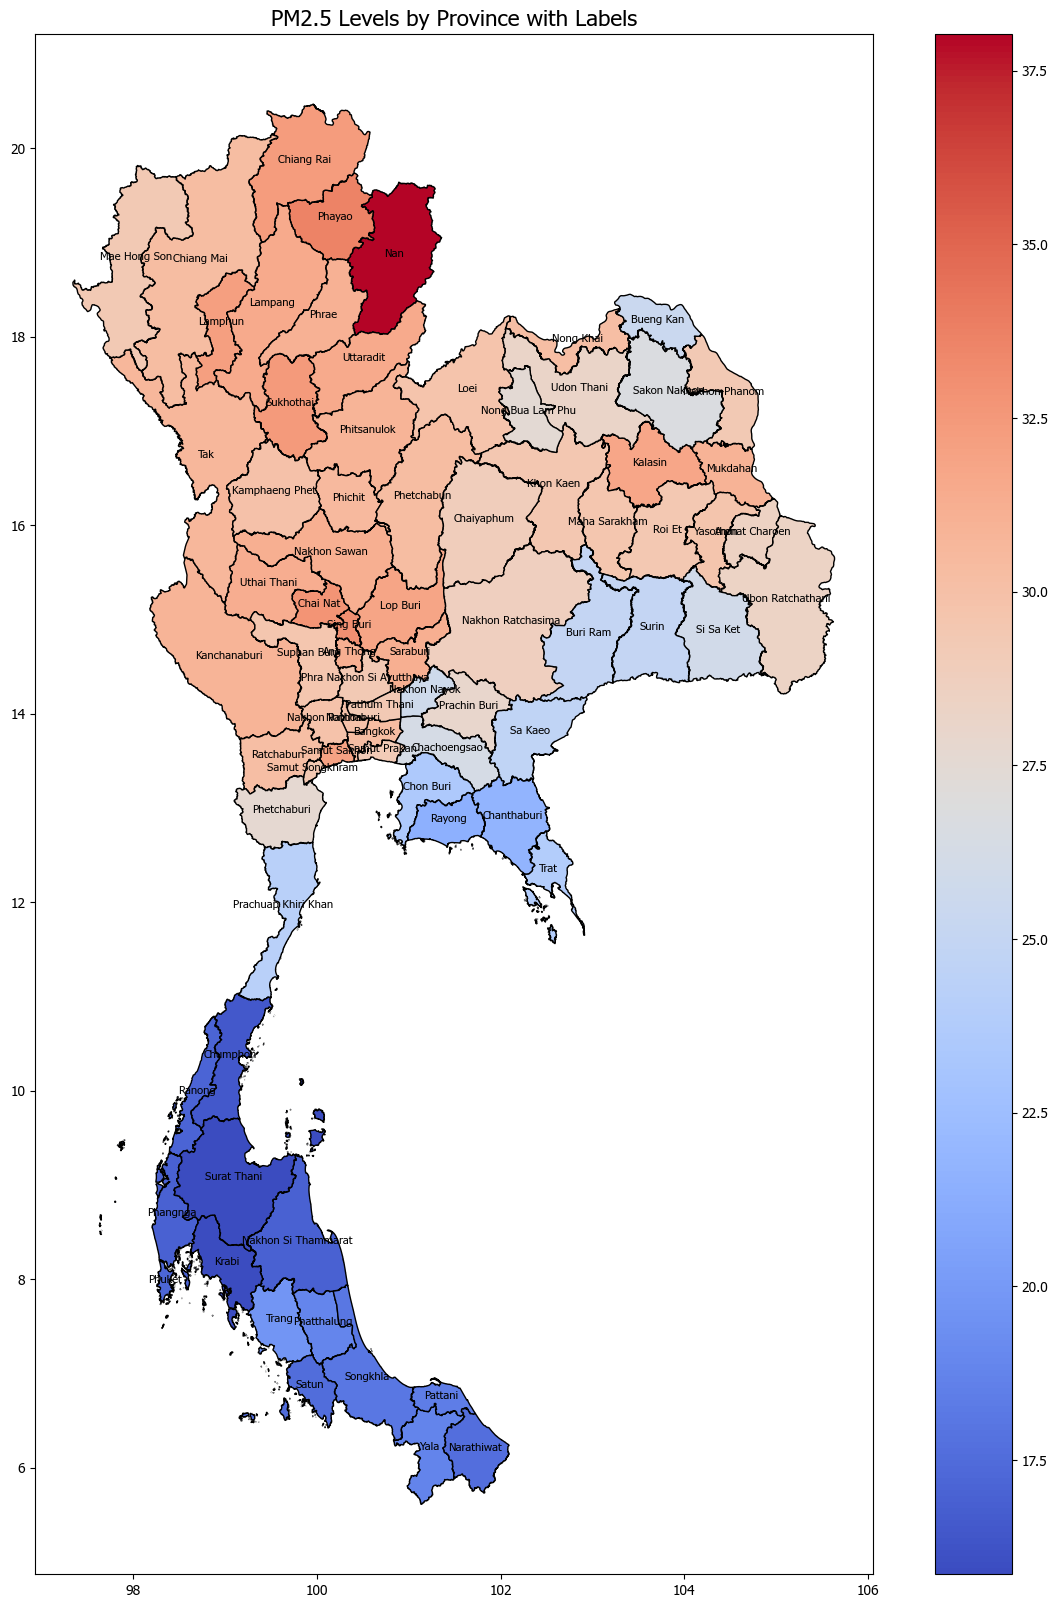

In [32]:
# แผนที่ประเทศไทยจำแนกสีตาม ค่าฝุ่นเฉลี่ย GeoDataFrame 
fig, ax = plt.subplots(1, 1, figsize=(16, 20))
merged_gdf.plot(
    column="PM2.5",
    cmap="coolwarm",
    legend=True,
    edgecolor="black",
    ax=ax
)

# Add province labels to the map
for idx, row in merged_gdf.iterrows():
    # Get the center of each province polygon
    x, y = row["geometry"].centroid.x, row["geometry"].centroid.y
    # Add text with province name at the centroid
    ax.text(
        x, y, row["Province_EN"],
        fontsize=8,  # Font size for labels
        ha="center", # Horizontal alignment
        color="black" # Text color
    )

# Add a title
plt.title("PM2.5 Levels by Province with Labels", fontsize=16)
plt.show()

<h4>แผนที่ประเทศไทยจำเเนกสีตามระดับฝุ่นโดยเฉลี่ยโดยจะเห็นได้ว่า ภาคเหนือจะมีค่าฝุ่นเฉลี่ยสูงอย่างเห็นได้ชัด </br>เเละจังหวัดที่เป็นภาคใต้จะเป็นจังหวัดที่อากาศค่อนข้างดี เรื่องนี้สามารถ อธิบายได้โดยลักษณะภูมิศาสตร์ คือ
<ul>
    <li>ภาคเหนือมีลักษณะเป็นเป็นแอ่งกระทะ ล้อมรอบด้วยภูเขา ทำให้ลมพัดผ่านได้น้อยและทำให้ระบายอากาศได้ไม่ค่อยดี
    <li>การเผาพื้นที่เกษตรกรรม เช่น เผาฟางข้าวและไร่อ้อยในไทยในช่วงหน้าหนาว 
    <li>ส่วนภาคใต้อยู่ดิดทะเลทั้งสองฝั่ง อ่าวไทยและอันดามัน ทำให้ลมจากทะเลช่วยพัดพาฝุ่นละอองออกไป 
   


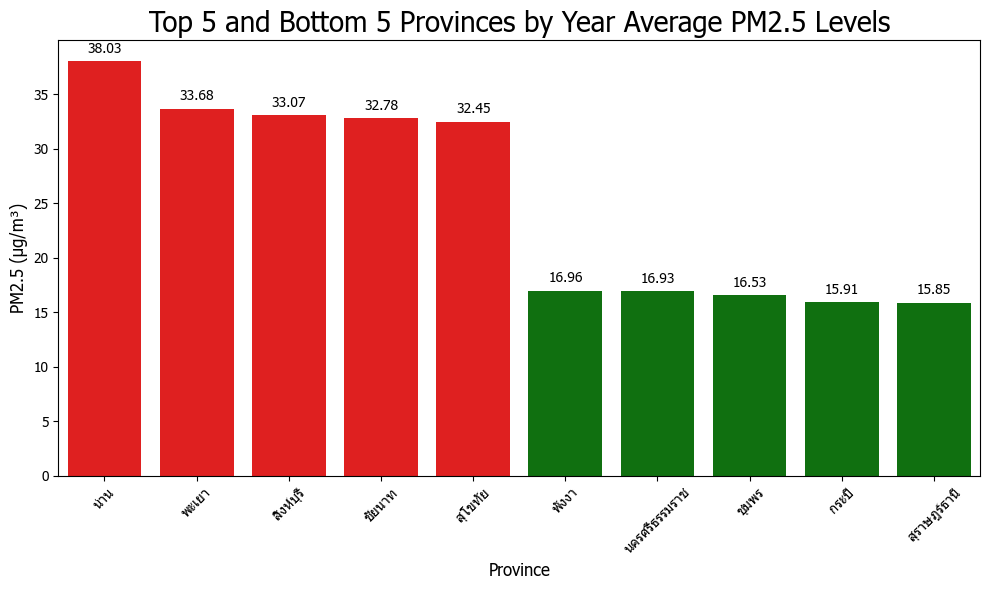

In [33]:

# Get the top 5 and bottom 5
top_5 = mean_by_province.head(5)  # Top 5 provinces with the highest PM2.5
bottom_5 = mean_by_province.tail(5)  # Bottom 5 provinces with the lowest PM2.5

# # Combine top 5 and bottom 5
combined = pd.concat([top_5, bottom_5]).reset_index(drop=True)

# Add color for top 5 and bottom 5
combined['Color'] = ['red'] * len(top_5) + ['green'] * len(bottom_5)

plt.figure(figsize=(10, 6))
rc('font', family='Tahoma')  # Set font

sns.barplot(
    data=combined,
    x="Province",
    y="PM2.5",
    hue="Province",
    palette=dict(zip(combined['Province'], combined['Color'])),
    legend=False
)

# Add data labels
for i, value in enumerate(combined["PM2.5"]):
    plt.text(
        i, value + 0.5,  # Position above the bar
        f'{value:.2f}',  # Format to 2 decimal places
        ha='center', va='bottom', fontsize=10
    )

# Customize the plot
plt.title("Top 5 and Bottom 5 Provinces by Year Average PM2.5 Levels", fontsize=20)
plt.ylabel("PM2.5 (µg/m³)", fontsize=12)
plt.xlabel("Province", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

<h4>จังหวัดที่มีค่าฝุ่นเฉลี่ยที่สูง 5 อันดับแรกเป็นภาคเหนือหมดเลย และจังหวัดที่อากาศดีที่สุดอยู่ภาคใต้หมด

<h3 > Trend ฝุ่นของกรุงเทพ (ข้อมูล 4 ปีย้อนหลัง)

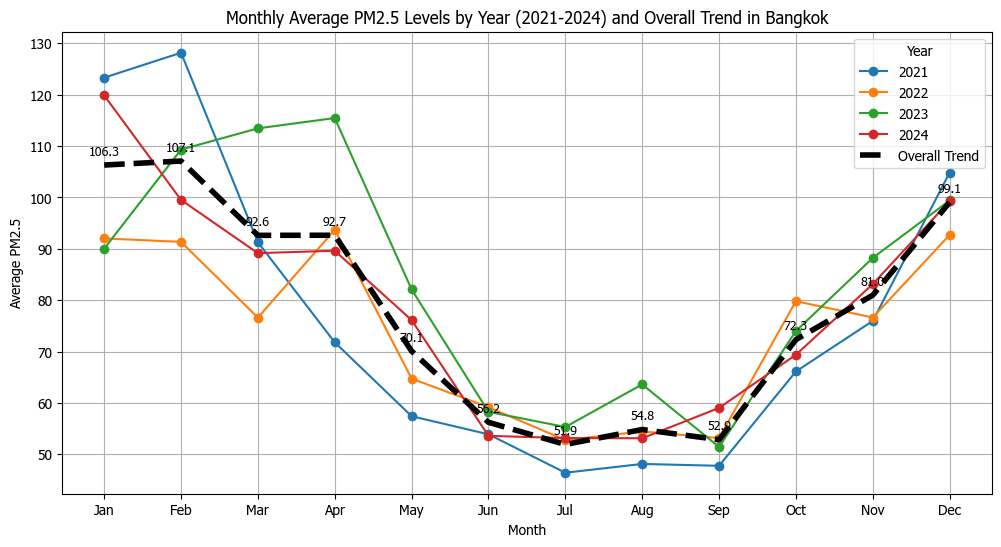

In [34]:
# Monthly Average PM2.5 Levels by Year (2021-2024) and Overall Trend in Bangkok
df1 = pd.read_csv(r"overallPm2.5\bangkok-air-quality.csv")
df1 = df1.iloc[:, :2]
df1.columns = df1.columns.str.strip()
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# Extract year and month
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month

# Drop rows where pm25 is missing
df1.dropna(subset=['pm25'], inplace=True)

# Convert pm25 to numeric (in case of string data)
df1['pm25'] = pd.to_numeric(df1['pm25'], errors='coerce')

# Filter the data to only include years 2021-2024
df1_filtered = df1[df1['year'].between(2021, 2024)] #คืนค่า True ถ้าปีอยู่ระหว่าง 2021-2024

# Group by 'year' and 'month', then calculate the mean of pm25
monthly_avg = df1_filtered.groupby(['year', 'month'])['pm25'].mean().unstack(level=0)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot individual years (same as before)
for year in monthly_avg.columns:
    plt.plot(monthly_avg.index, monthly_avg[year], marker='o', label=str(year))

# Plot overall trend across all years (combined)
monthly_avg_mean = monthly_avg.mean(axis=1)
plt.plot(monthly_avg.index, monthly_avg_mean, color='black', linestyle='--',linewidth=4, label='Overall Trend')

# Annotate the mean trend
for i, value in enumerate(monthly_avg_mean):
    plt.annotate(f'{value:.1f}', 
                 xy=(monthly_avg.index[i], value), 
                 xytext=(0, 5),  # Offset the annotation slightly
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=9, color='black')

# Graph labels and title
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.title("Monthly Average PM2.5 Levels by Year (2021-2024) and Overall Trend in Bangkok")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")
plt.grid(True)

# Show plot
plt.show()

<h4>กราฟค่าฝุ่นในกรุงเทพ 4 ปีย้อนหลัง จะเห็นได้ว่าจะมีฝุ่นจะมีค่าสูงสุดในช่วงฤดูหนาว และจะเริ่มลดในช่วงหน้าร้อนเดือนเมษายน</h4> 

<h3>ฝุ่นส่งผลกระทบกับจำนวนนักท่องเที่ยวในไทยหรือไม่?</h3>


In [35]:
# Number of Foreign Tourists by month
df3 = pd.read_excel(r"tourist data\tourist2024monthy.xlsx",skiprows=5)

df3.rename(columns={'Unnamed: 0': 'Index', 'Unnamed: 1': 'Indicator'}, inplace=True)

df3 = df3.iloc[0:1, :]
# Convert to long format
df_long = df3.melt(id_vars=['Index', 'Indicator'], var_name='Month', value_name='Number of Foreign Tourists')

# Remove the "Index" column (if not needed)
df_long.drop(columns=['Index'], inplace=True)
df_long['Number of Foreign Tourists'] = df_long['Number of Foreign Tourists'] * 1000

# Clean Month column (remove " p" if needed)
df_long['Month'] = df_long['Month'].str.replace(" p", "", regex=True)
df_long['Month'] = df_long['Month'].str.strip()
df_long["Month"] = df_long["Month"].str.capitalize() #เพือ่ให้เดือนเชื่อมโยงกับ data ค่าเฉลี่ยฝุ่นได้


# Assuming df is your DataFrame
df_long = df_long.drop(columns=["Indicator"])  # Drop the "Indicator" column

# # Split "Month" into "Month" and "Year"
df_long[['Month', 'Year']] = df_long['Month'].str.split(' ', expand=True)

# Convert "Number of Foreign Tourists" to integer
df_long['Number of Foreign Tourists'] = df_long['Number of Foreign Tourists'].astype(int)




# # Display result
print(df_long)



   Month  Number of Foreign Tourists  Year
0    Dec                     3627440  2024
1    Nov                     3150240  2024
2    Oct                     2679180  2024
3    Sep                     2521010  2024
4    Aug                     2963150  2024
5    Jul                     3103420  2024
6    Jun                     2740370  2024
7    May                     2633460  2024
8    Apr                     2757130  2024
9    Mar                     2982720  2024
10   Feb                     3352300  2024
11   Jan                     3035300  2024


In [36]:
#เชื่อม ข้อมูลนักท่องเที่ยวและค่าฝุ่น PM 2.5
df_merged2 = monthly_avg_pm_df[monthly_avg_pm_df["Year"] == 2024].merge(df_long, on="Month", how="left")

df_merged2

,Year_x,Month,PM2.5,Number of Foreign Tourists,Year_y
0,2024,Jan,35.329506,3035300,2024
1,2024,Feb,39.315900,3352300,2024
2,2024,Mar,41.723437,2982720,2024
3,2024,Apr,42.542110,2757130,2024
4,2024,May,23.271285,2633460,2024
5,2024,Jun,12.705172,2740370,2024
6,2024,Jul,12.530628,3103420,2024
7,2024,Aug,13.002613,2963150,2024
8,2024,Sep,14.819360,2521010,2024
9,2024,Oct,19.731498,2679180,2024


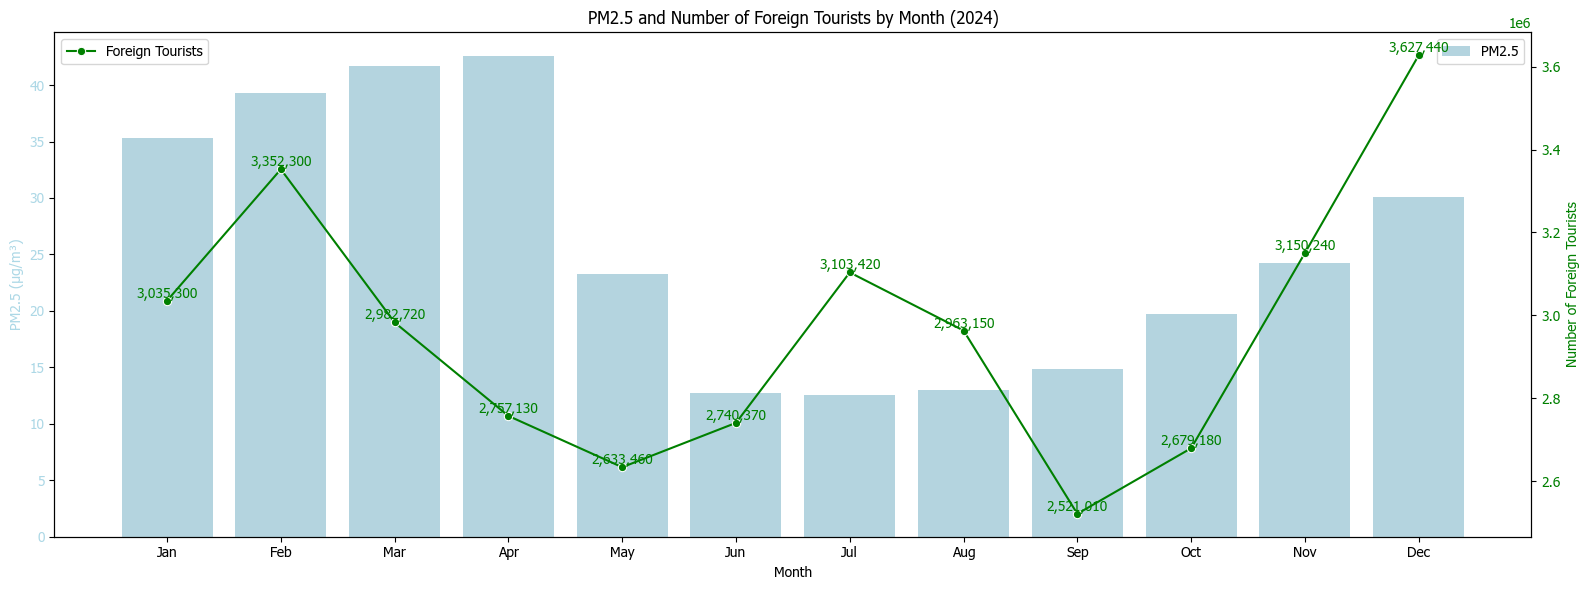

In [37]:
# สร้างกราฟจำนวนนักท่องเที่ยวและค่า Pm2.5
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar plot for PM2.5
sns.barplot(x='Month', y='PM2.5', data=df_merged2, ax=ax1, color='lightblue', label='PM2.5')
ax1.set_xlabel('Month')
ax1.set_ylabel('PM2.5 (µg/m³)', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')

# Create a second y-axis for the Number of Foreign Tourists
ax2 = ax1.twinx()  # Share the same x-axis
sns.lineplot(x='Month', y='Number of Foreign Tourists', data=df_merged2, ax=ax2, color='green', marker='o', label='Foreign Tourists')
ax2.set_ylabel('Number of Foreign Tourists', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add data labels to the line plot
for i, txt in enumerate(df_merged2['Number of Foreign Tourists']):
    ax2.text(i, txt, f'{txt:,}', color='green', ha='center', va='bottom', fontsize=10)

# Add a title
plt.title('PM2.5 and Number of Foreign Tourists by Month (2024)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

<h4>จากกราฟเส้นสีเขียวคือจำนวนนักท่องเที่ยว แท่งสีฟ้าคือระดับ PM 2.5 จะเห็นได้ว่า ในปีที่เเล้วจำนวนนักท่องเที่ยวอยู่ที่ประมาณ 3ล้านคนในเดือนช่วงเดือน มกราคม และ กุมภาพันธ์ ก่อนที่จะค่อยๆลดลงในเดือน มีนาคม แล้วก็กลับมาดีดในช่วง กรกฎาคม เเล้วก็พีคสุดในเดือนธันวาคม ซึ่งจากภาพนี้ก็ยังอาจไม่สามารถสรุปได้ว่ามันส่งผลต่อกันไหม

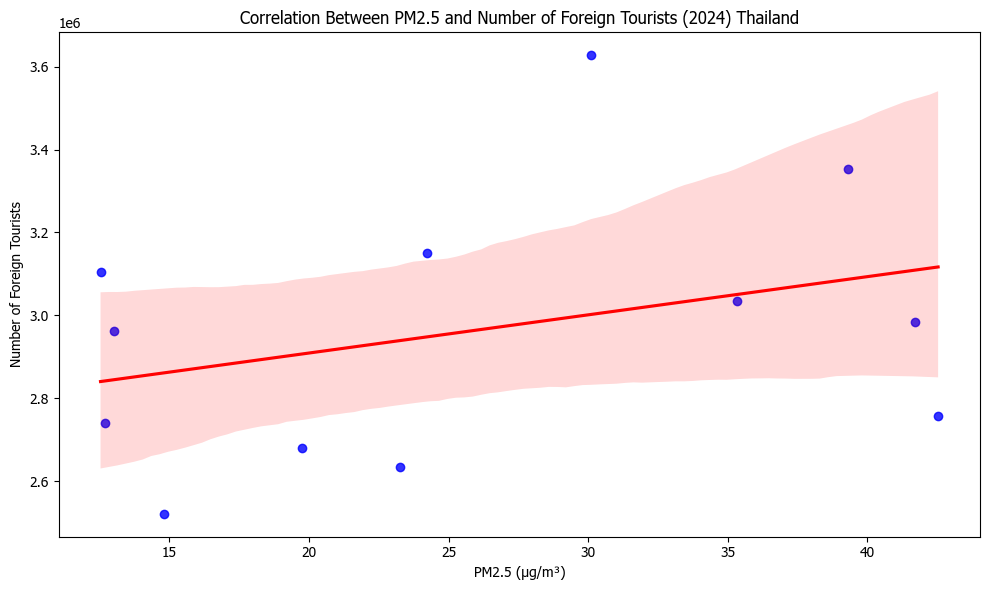

In [38]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))

sns.regplot(x='PM2.5', y='Number of Foreign Tourists', data=df_merged2, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

# Add labels and title
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Number of Foreign Tourists')
plt.title('Correlation Between PM2.5 and Number of Foreign Tourists (2024) Thailand')

# Show the plot
plt.tight_layout()
plt.show()

<h4>จากกราฟแสดงให้เห็นว่า นักท่องเที่ยวมาประเทศไทยเยอะในช่วงที่ PM 2.5 เยอะเช่นกัน</้>
 สิ่งที่พบจาก Scatter plot คือจำนวนนักท่องกับค่าฝุ่นนั้นมีลักษณะความสัมพันธ์เป็นบวกเชิงๆอ่อน คือช่วงที่นักท่องเที่ยวเยอะก็มักจะเป็นช่วงที่ฝุ่นเยอะเช่นกัน แต่นี่ก็อาจเป็นเพียงความบังเอิญเฉยๆ เพราะฉะนัั้น เราจึงขอสรุปว่าระดับฝุ่นนั้นไม่ได้ส่งผลต่อจำนวนนักท่องเที่ยวอย่างมีนัยยะสำคัญ เพราะฉะนั้นอาจกล่าวได้ว่ามีปัจจัยอื่นที่นักท่องเที่ยวให้ความสำคัญมากกว่าค่าฝุ่น อย่างเช่น เทศกาล
มาตราการกระตุ้นการท่องเที่ยวของรัฐบาล และการอนุญาตให้เข้าประเทศโดยไม่ต้องขอวีซ่าจากบางประเทศ 

<h3>เปรียบเทียบข้อมูลฝุ่นและการท่องเที่ยวเมืองที่มีฝุ่นเยอะที่สุดแห่งนึงของโลก Delhi, ประเทศอินเดีย

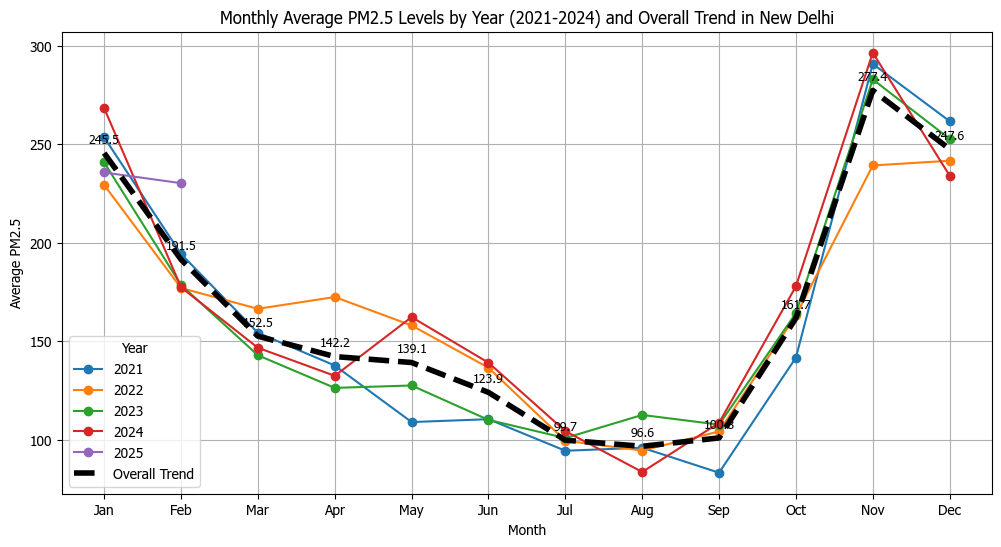

In [39]:
df_delhi = pd.read_csv(r"india tourist data\major-dhyan chand national stadium, delhi-air-quality.csv")
df_delhi = df_delhi.iloc[:, :2]
df_delhi.columns = df_delhi.columns.str.strip()
df_delhi['date'] = pd.to_datetime(df_delhi['date'], errors='coerce')

# Extract year and month
df_delhi['Year'] = df_delhi['date'].dt.year
df_delhi['Month'] = df_delhi['date'].dt.month

# Drop rows where pm25 is missing and filter years interested
df_delhi = df_delhi[df_delhi['Year'] >= 2021]
# Convert pm25 to numeric (in case of string data)
df_delhi['pm25'] = pd.to_numeric(df_delhi['pm25'], errors='coerce')
df_delhi.dropna(subset=['pm25', 'date'], inplace=True)


# คำนวณค่าเฉลี่ย PM2.5 รายเดือนสำหรับแต่ละปี
monthly_avg = df_delhi.groupby(['Year', 'Month'])['pm25'].mean().unstack(level=0)

# สร้างกราฟ
plt.figure(figsize=(12, 6))

# วาดกราฟสำหรับแต่ละปี
for year in monthly_avg.columns:
    plt.plot(monthly_avg.index, monthly_avg[year], marker='o', label=str(year))

# คำนวณและวาดกราฟแนวโน้มโดยรวม
monthly_avg_mean = monthly_avg.mean(axis=1)
plt.plot(monthly_avg.index, monthly_avg_mean, color='black', linestyle='--', linewidth=4, label='Overall Trend')

# เพิ่มค่าเฉลี่ยบนกราฟ
for i, value in enumerate(monthly_avg_mean):
    plt.annotate(f'{value:.1f}', 
                 xy=(monthly_avg.index[i], value), 
                 xytext=(0, 5),  # ระยะห่างของข้อความ
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=9, color='black')

# ปรับแต่งกราฟ
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.title("Monthly Average PM2.5 Levels by Year (2021-2024) and Overall Trend in New Delhi")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")
plt.grid(True)

# แสดงกราฟ
plt.show()

<h3>เทรนด์ฝุ่นเมือง Delhi มีลักษณะสูงขึ้นในช่วงดูหนาวเหมือนกรุงเทพและค่อนข้างคงเส้นคงวาและชัดเจนกว่า

In [40]:
# Convert numeric Month to three-letter format (Jan, Feb, ...)
df_delhi["Month"] = df_delhi["Month"].apply(lambda x: pd.to_datetime(f'2023-{x:02d}-01').strftime('%b'))
# Group by Year and Month, then calculate the average PM2.5
df_delhi_avg = df_delhi.groupby(["Year", "Month"], as_index=False)["pm25"].mean()

# Rename pm25 column to indicate it's an average
df_delhi_avg.rename(columns={"pm25": "Avg_PM25"}, inplace=True)

# Display the result
df_delhi_avg


,Year,Month,Avg_PM25
0,2021,Apr,137.607143
1,2021,Aug,95.838710
2,2021,Dec,261.741935
3,2021,Feb,194.250000
4,2021,Jan,253.516129
5,2021,Jul,94.290323
6,2021,Jun,110.333333
7,2021,Mar,154.200000
8,2021,May,108.870968
9,2021,Nov,290.833333


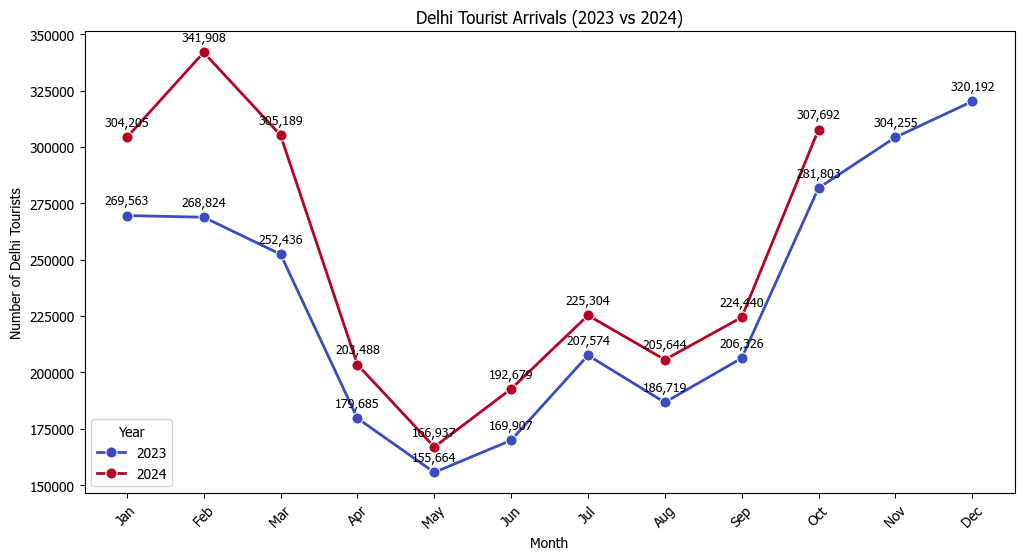

In [41]:
#เชื่อมข้อมูลเดือนฝุ่นและจำนวน
delhi_tourist = pd.read_excel(r"india tourist data\delhitourist.xlsx")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
delhi_tourist["Month"] = pd.Categorical(delhi_tourist["Month"], categories=month_order, ordered=True)

# Set figure size
plt.figure(figsize=(12, 6))

# Line plot
sns.lineplot(x="Month", y="Delhi Tourists", hue="Year", data=delhi_tourist, marker="o", linewidth=2, markersize=8, palette="coolwarm")

# Add annotations
for year in delhi_tourist["Year"].unique():
    subset = delhi_tourist[delhi_tourist["Year"] == year]
    for i, row in subset.iterrows():
        plt.text(row["Month"], row["Delhi Tourists"] + 5000, f"{row['Delhi Tourists']:,}", 
                 horizontalalignment='center', fontsize=9, color="black")

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Number of Delhi Tourists")
plt.title("Delhi Tourist Arrivals (2023 vs 2024)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend(title="Year")

# Show the plot
plt.show()

<h4>เทรนด์นักท่องเที่ยวเมือง delhi เยอะสุดช่วงต้นปีกับปลายปีเหมือนไทย

In [42]:
# Merge datasets
df_merged3 = pd.merge(delhi_tourist, df_delhi_avg, on=['Year', 'Month'], how='left')
df_merged3

,Year,Month,Tourists,Delhi Tourists,Avg_PM25
0,2023,Jan,868160,269563,240.774194
1,2023,Feb,865779,268824,178.500000
2,2023,Mar,795827,252436,142.806452
3,2023,Apr,603985,179685,126.233333
4,2023,May,598480,155664,127.451613
5,2023,Jun,648008,169907,109.966667
6,2023,Jul,760623,207574,100.750000
7,2023,Aug,643194,186719,112.483871
8,2023,Sep,648213,206326,107.566667
9,2023,Oct,811411,281803,164.258065


<h3> Scatter plot & Linear regression เพื่อหาแนวโน้มและความสัมพันธ์ระหว่างฝุ่นกับจำนวนนักท่องเที่ยว

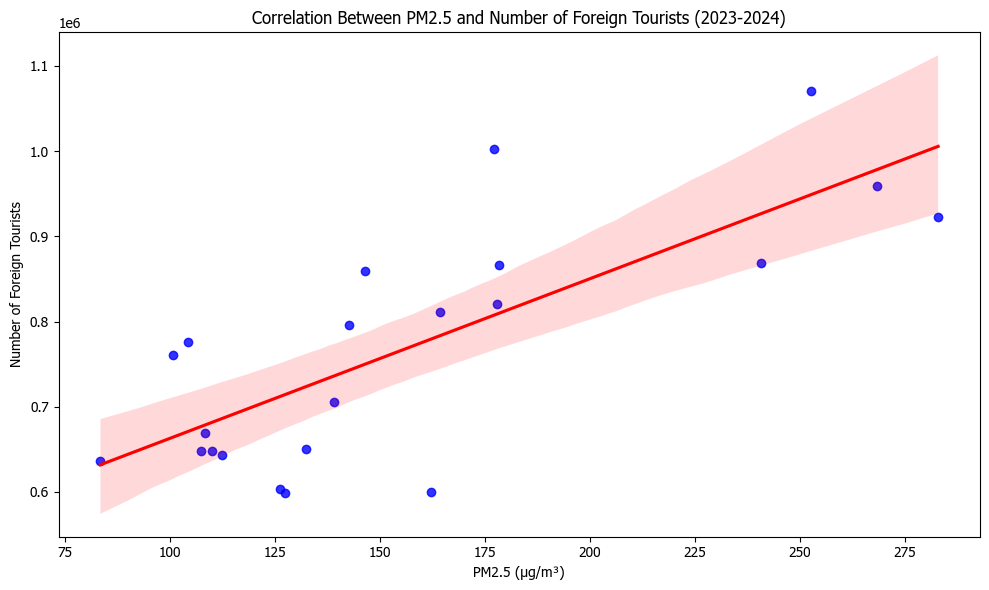

In [43]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df_merged3["Avg_PM25"], y=df_merged3["Tourists"], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and Title
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Number of Foreign Tourists')
plt.title('Correlation Between PM2.5 and Number of Foreign Tourists (2023-2024)')

# Show plot
plt.tight_layout()
plt.show()

<h3> อินเดียก็มีความสัมพันธ์ของฝุ่นในลักษณะเดียวกับไทยคือตอนที่ฝุ่นเยอะนักท่องเที่ยวก็เยอะเช่นกัน 
<h3> เพราะฉะนั้นสรุปได้ว่า เช่นเดียวกับไทยฝุ่นก็ไม่ได้มีผลทำให้นักท่องเที่ยวลดลง ไม่ตรงกับข้อสันนิษฐานที่ตั้งไว้ อาจด้วยหลายปัจจัย 
เช่น 
<ul>
    <li>ช่วงฤดูหนาวมีเทศกาลเป็นจำนวนมาก จึงดึงดูดนักท่องเที่ยว
    <li>เป็นช่วงหลัง covid คนจึงมีความต้องการที่จะเที่ยว
    <li>การท่องเที่ยวเป็นระยะสั้น นักท่องเที่ยวของกลุ่มไม่ได้ตระหนักถึงผลกระทบจากปัญหาฝุ่น PM 2.5 
    <li>นักท่องเที่ยวบางกลุ่มวางแผนการท่องเที่ยวไว้ล่วงหน้า เมื่อมีปัญหาฝุ่น PM 2.5 จึงไม่ได้ส่งผลให้ตัดสินใจยกเลิกการมาเที่ยว

<h2><center><strong>สรุป</strong></br>"แม้ว่าปัญหาฝุ่น PM 2.5 จะเป็นปัญหาที่หลายประเทศต้องเผชิญ แต่จากการนำข้อมูลมาวิเคราะห์พบว่า </br>ปัญหา PM 2.5 ไม่ได้ส่งผลให้การท่องเที่ยวมีจำนวนลดลงแต่อย่างใด"</center></h3>

<center style="color:orange;"><h1> Thank you อย่าลืมรักษาสุขภาพและใส่แมสกันนะคร้าบ 😷
 </h1></center>

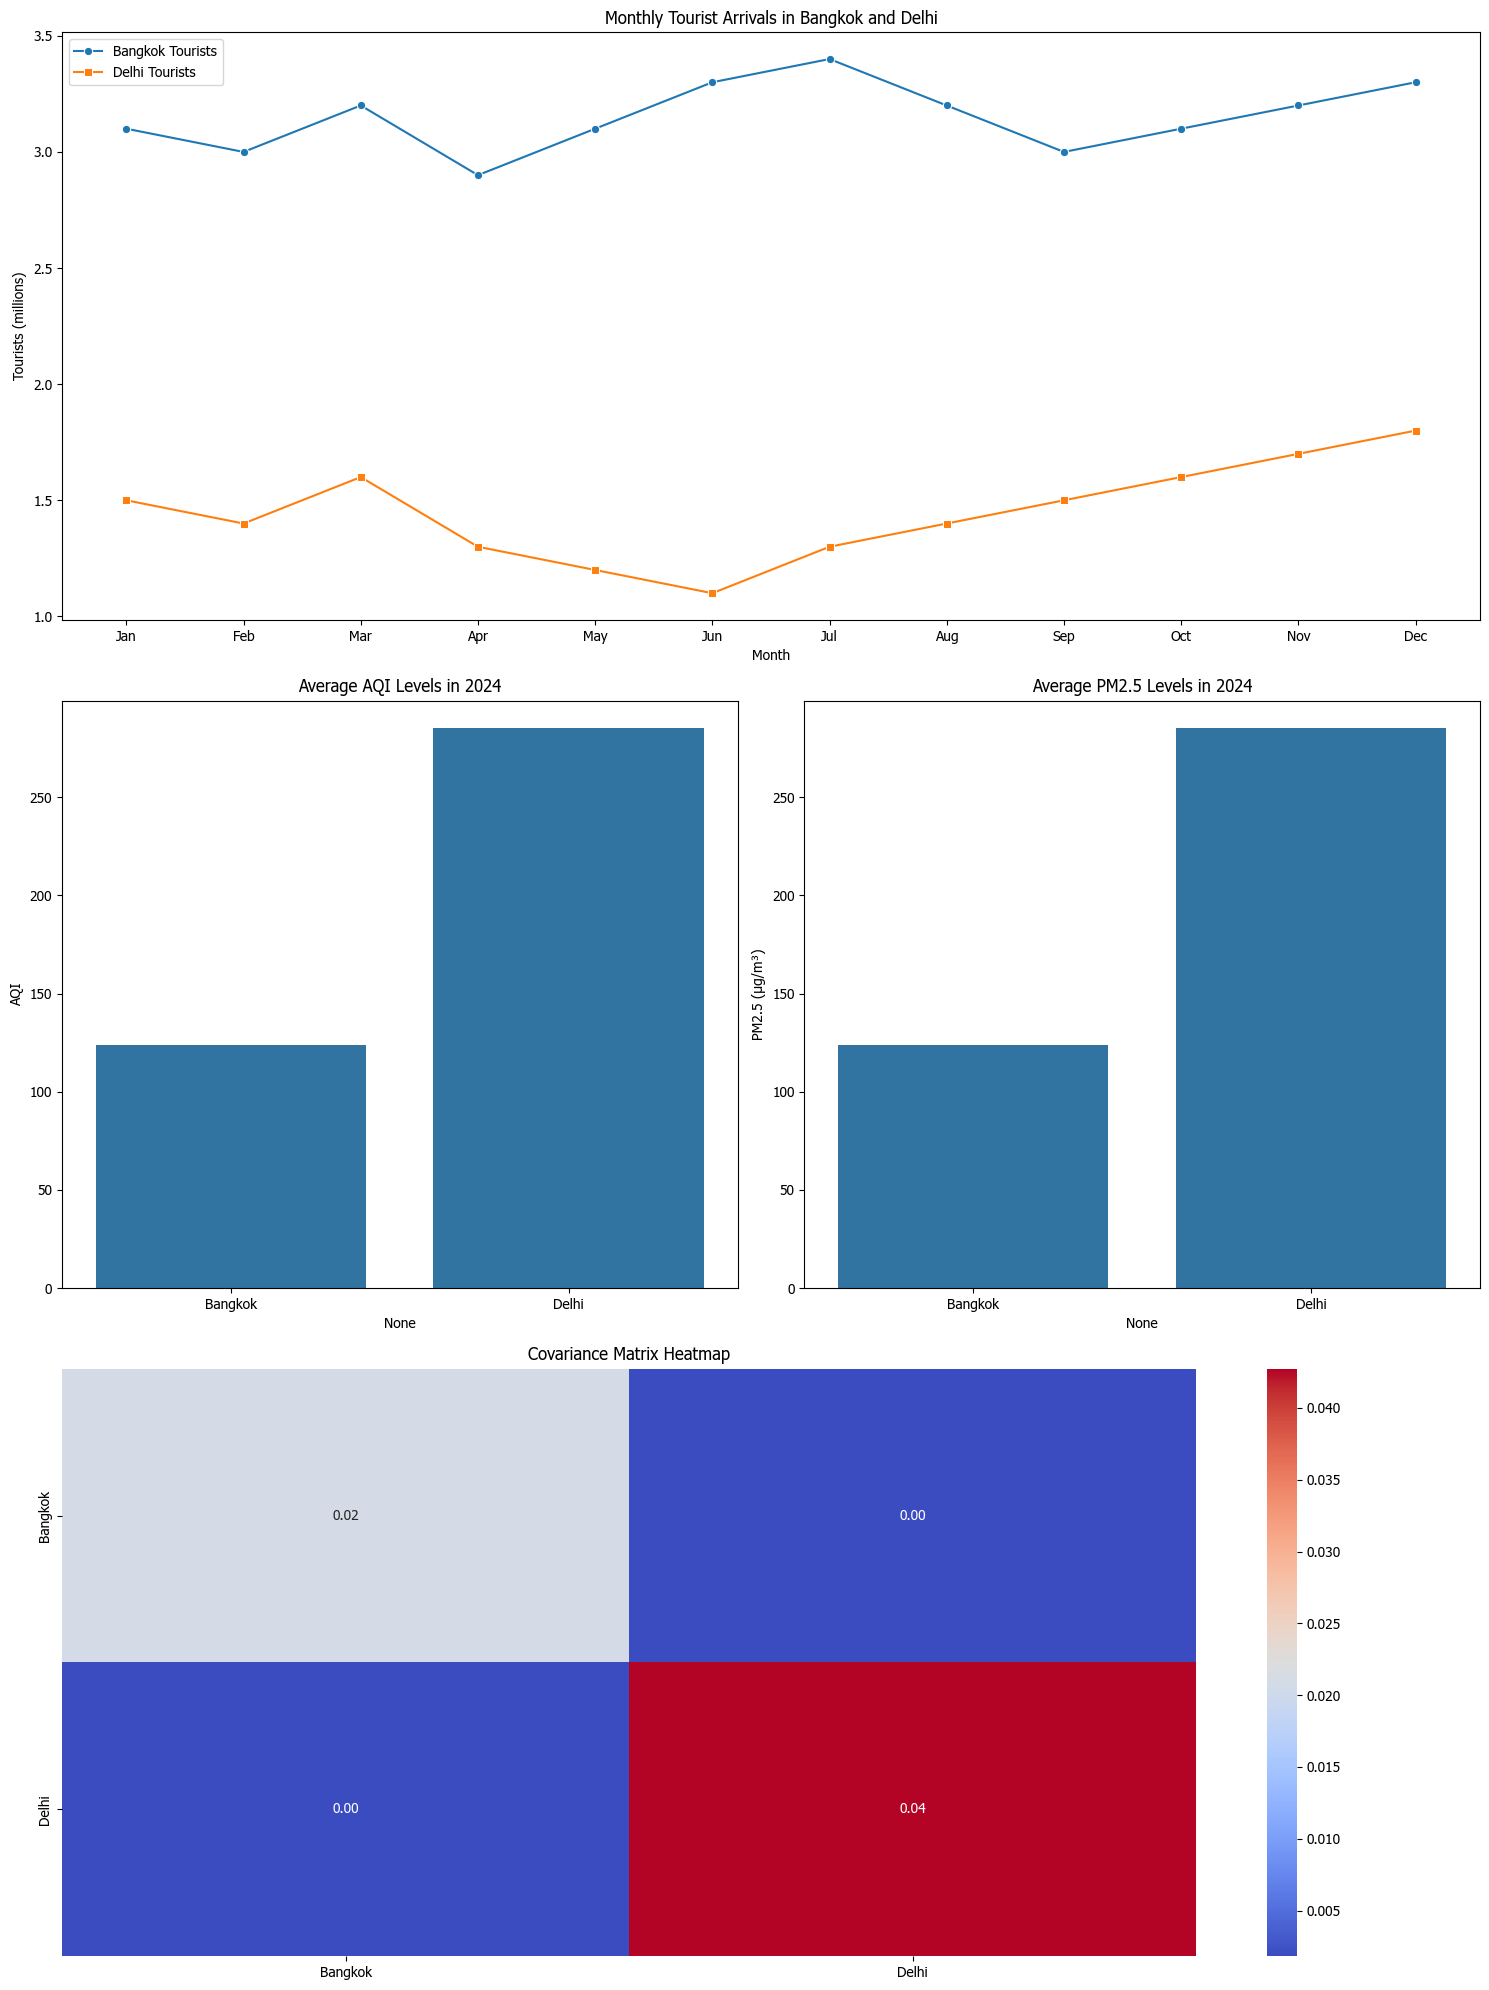

In [44]:
# API Keys
OPENWEATHER_API_KEY = "f42868a5cc906f41ef527a867f332167"
AQICN_API_KEY = "64833abcfce927724479e59f62c8499f45502804"

# Function to get AQI data
def get_aqi(city):
    url = f"https://api.waqi.info/feed/{city}/?token={AQICN_API_KEY}"
    response = requests.get(url).json()

    if response["status"] == "ok":
        aqi = response["data"]["aqi"]
        pm25 = response["data"].get("iaqi", {}).get("pm25", {}).get("v", None)
        return aqi, pm25
    return None, None

# Cities to analyze
cities = {"Bangkok": "bangkok", "Delhi": "delhi"}
aqi_data = {}
pm25_data = {}

# Get AQI & PM2.5 data for each city
for city, city_code in cities.items():
    aqi, pm25 = get_aqi(city_code)
    aqi_data[city] = aqi
    pm25_data[city] = pm25

# Convert data to DataFrames
df_aqi = pd.DataFrame.from_dict(aqi_data, orient='index', columns=['AQI'])
df_pm25 = pd.DataFrame.from_dict(pm25_data, orient='index', columns=['PM2.5'])

# Tourist data
tourist_data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Bangkok": [3.1, 3.0, 3.2, 2.9, 3.1, 3.3, 3.4, 3.2, 3.0, 3.1, 3.2, 3.3],
    "Delhi": [1.5, 1.4, 1.6, 1.3, 1.2, 1.1, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8]
}
df_tourism = pd.DataFrame(tourist_data)

# Create figure with subplots
fig = plt.figure(figsize=(15, 20))
gs = fig.add_gridspec(3, 2)  # 3 rows, 2 columns

# Tourism data plot (spanning two columns)
ax1 = fig.add_subplot(gs[0, :])
sns.lineplot(data=df_tourism, x="Month", y="Bangkok", label="Bangkok Tourists", marker='o', ax=ax1)
sns.lineplot(data=df_tourism, x="Month", y="Delhi", label="Delhi Tourists", marker='s', ax=ax1)
ax1.set_title("Monthly Tourist Arrivals in Bangkok and Delhi")
ax1.set_ylabel("Tourists (millions)")
ax1.legend()

# AQI Barplot
ax2 = fig.add_subplot(gs[1, 0])
sns.barplot(x=df_aqi.index, y=df_aqi['AQI'], ax=ax2)
ax2.set_title("Average AQI Levels in 2024")
ax2.set_ylabel("AQI")

# PM2.5 Barplot
ax3 = fig.add_subplot(gs[1, 1])
sns.barplot(x=df_pm25.index, y=df_pm25['PM2.5'], ax=ax3)
ax3.set_title("Average PM2.5 Levels in 2024")
ax3.set_ylabel("PM2.5 (µg/m³)")

# Covariance Heatmap
ax4 = fig.add_subplot(gs[2, :])
cov_matrix = df_tourism.set_index("Month").cov()  # Compute covariance matrix
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax4)
ax4.set_title("Covariance Matrix Heatmap")

plt.tight_layout()
plt.show()
